In [1]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from os.path import join
from bridgescaler import load_scaler
%matplotlib inline

In [4]:
ls /glade/derecho/scratch/dgagne/SEALS_output/2024-07-19_1211/

block_transformer_leak_loc_2024-07-19_1211.keras
block_transformer_leak_loc_model_hist_2024-07-19_1211.csv
block_transformer_leak_loc_output_2024-07-19_1211_train.nc
block_transformer_leak_loc_output_2024-07-19_1211_val.nc
coord_scaler.json
loc_rate_block_transformer_2024-07-19_1211.keras
loc_rate_block_transformer_model_hist_2024-07-19_1211.csv
loc_rate_block_transformer_output_2024-07-19_1211_train.nc
loc_rate_block_transformer_output_2024-07-19_1211_val.nc
sensor_scaler.json
train_files.csv
train.yml
validation_files.csv


In [5]:
model_path = "/glade/derecho/scratch/dgagne/SEALS_output/2024-07-19_1211/"
val_loc_output = xr.open_dataset(join(model_path, "block_transformer_leak_loc_output_2024-07-19_1211_val.nc"))

In [6]:
val_loc_output

<xarray.Dataset> Size: 16MB
Dimensions:        (sample: 34992, pot_leak_locs: 38)
Dimensions without coordinates: sample, pot_leak_locs
Data variables:
    targets        (sample, pot_leak_locs) int64 11MB ...
    leak_loc_pred  (sample, pot_leak_locs) float32 5MB ...

In [7]:
val_files = pd.read_csv(join(model_path, "validation_files.csv"))

In [8]:
f_indices = val_files["validation_files"].str.split("/").str[-1].str[17:-3].str.replace("RefOri_","").str.replace("srcDim", "SD_")

In [9]:
f_indices

0       SBL_04_set0_RotCW60_SD_6
1      SBL_05_set3_RotCW180_SD_7
2        SBL_04_set1_RotCW0_SD_8
3      SBL_05_set2_RotCW225_SD_0
4      SBL_04_set3_RotCW180_SD_5
                 ...            
103    SBL_05_set3_RotCW180_SD_6
104      SBL_05_set2_RotCW0_SD_1
105      SBL_04_set2_RotCW0_SD_4
106    SBL_04_set3_RotCW225_SD_2
107    SBL_05_set0_RotCW225_SD_7
Name: validation_files, Length: 108, dtype: object

In [10]:
all_val_data = []
decoder_data = []
encoder_data = []
for val_file in val_files["validation_files"]:
    val_file_ds = xr.open_dataset(val_file)
    all_val_data.append(val_file_ds["target"][:, :, 0])
    decoder_data.append(val_file_ds["decoder_input"])
    encoder_data.append(val_file_ds["encoder_input"])
    val_file_ds.close()
val_data = xr.concat(all_val_data, "sample")

In [133]:
decoder_data[2].shape

(576, 38, 1, 8, 2)

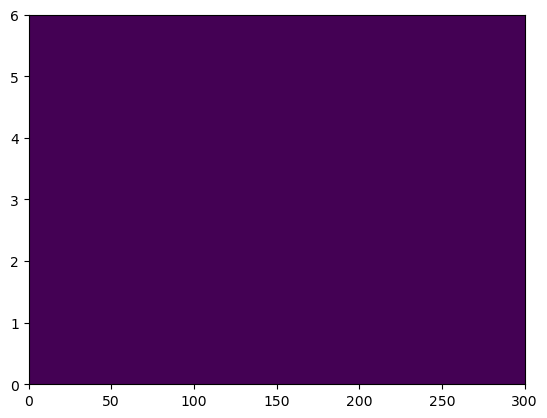

In [37]:
plt.pcolormesh(val_file_ds["encoder_input"][16,:, :, -1, 0])

In [27]:
val_file_ds["encoder_input"][0,:, :, -1, 0].max()

<xarray.DataArray 'encoder_input' ()> Size: 4B
array(0., dtype=float32)
Coordinates:
    variable  <U12 48B 'q_CH4'

In [27]:
pred_leak_loc_order = np.argsort(val_loc_output["leak_loc_pred"].values, axis=1)[:, ::-1]


In [73]:
pred_leak_loc_order

array([[33, 18, 31, ..., 30,  9, 37],
       [28, 11, 30, ..., 23, 32, 37],
       [30, 33, 21, ..., 29, 25, 37],
       ...,
       [37, 21, 15, ..., 10, 14, 25],
       [ 2, 26,  5, ..., 27, 11,  8],
       [31, 35, 13, ..., 36, 32, 18]])

In [72]:
pred_leak_loc_order[pred_index]

array([32, 13, 10, 18, 34, 30, 15,  7, 23, 11, 12, 19,  1,  0, 27, 29, 35,
       17,  2, 31, 22, 28, 16,  4,  9, 26, 36, 20,  8, 25,  5, 24,  6, 33,
       14,  3, 21, 37])

In [59]:
np.maximum(val_loc_output["leak_loc_pred"][pred_index], 1e-5)

<xarray.DataArray 'leak_loc_pred' (pot_leak_locs: 38)> Size: 152B
array([3.0508453e-03, 9.9999997e-06, 9.9999997e-06, 9.9999997e-06,
       9.9999997e-06, 3.0804265e-02, 9.9999997e-06, 4.1342332e-04,
       9.9999997e-06, 9.9999997e-06, 9.9999997e-06, 1.4161938e-01,
       3.4473587e-03, 9.9999997e-06, 9.9999997e-06, 4.1031542e-01,
       7.0211041e-05, 1.3080437e-01, 3.5336386e-02, 1.0515486e-01,
       9.9999997e-06, 3.2917254e-02, 1.5665434e-02, 9.9999997e-06,
       9.9999997e-06, 9.9999997e-06, 9.9999997e-06, 9.9999997e-06,
       7.8757975e-04, 9.9999997e-06, 9.9999997e-06, 8.8500343e-02,
       3.8758438e-04, 1.9711515e-04, 5.1761424e-04, 9.9999997e-06,
       9.9999997e-06, 9.9999997e-06], dtype=float32)
Dimensions without coordinates: pot_leak_locs

In [135]:
val_data

<xarray.DataArray 'target' (sample: 6336, pot_leak: 38)> Size: 2MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])
Dimensions without coordinates: sample, pot_leak

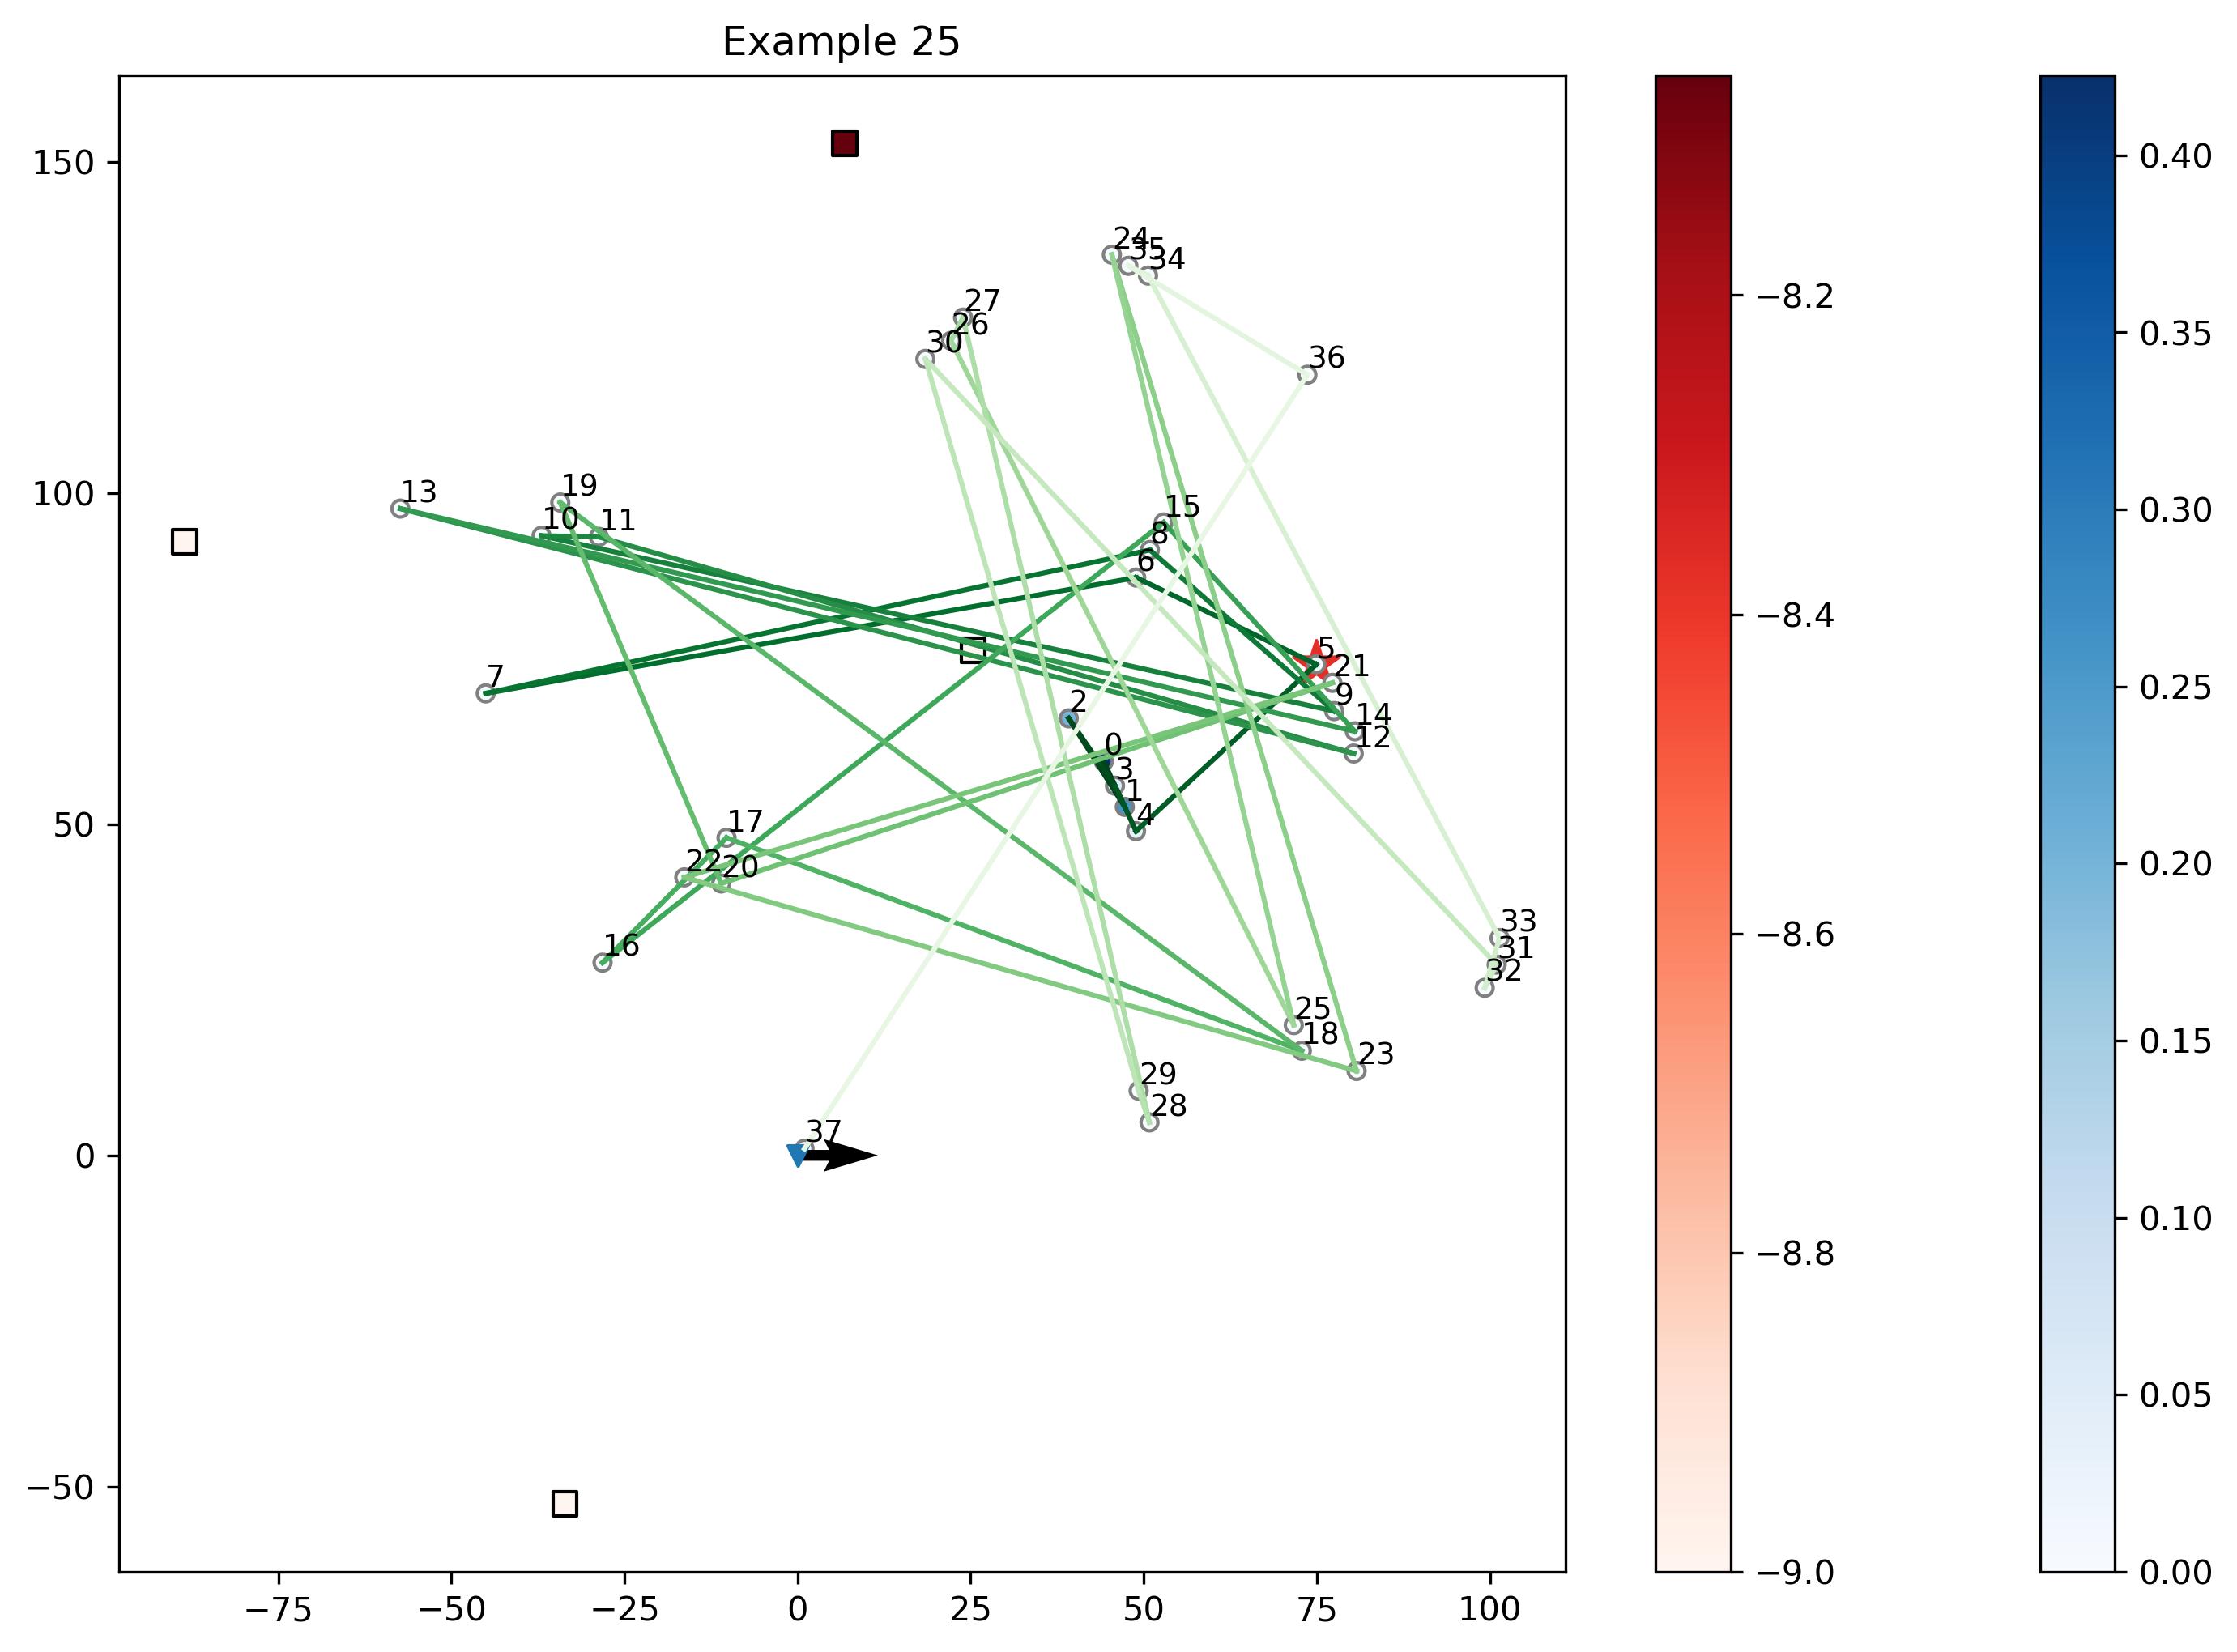

In [142]:
plt.figure(figsize=(12, 8), dpi=300)
pred_index = 25
v_file = 7
f_length = decoder_data[0].shape[0]
pi = val_data[v_file * f_length + pred_index] > 0
leak_coords = decoder_data[v_file][pred_index, :, 0, :3, 0]
encoder_coords = encoder_data[v_file][pred_index, :, 0, :3, 0]
plt.scatter(leak_coords[pi, 0] * leak_coords[pi, 1], 
            leak_coords[pi, 0] * leak_coords[pi, 2],
            200, 1, marker='*', cmap='Reds', vmin=0, vmax=1.5)
plt.scatter(leak_coords[:, 0] * leak_coords[:, 1], leak_coords[:, 0] * leak_coords[:, 2],
           25,val_loc_output["leak_loc_pred"][f_length * v_file + pred_index], edgecolor='0.5',
           cmap="Blues")
for i in np.arange(38):
    i_val = np.where(pred_leak_loc_order[f_length * v_file + pred_index] == i)[0][0]
    p_val = val_loc_output["leak_loc_pred"][f_length * v_file + pred_index, i]
    plt.text(leak_coords[i, 0] * leak_coords[i, 1], 
             leak_coords[i, 0] * leak_coords[i, 2],
             #f"{p_val:0.2f}", 
             f"{i_val:d}",
             ha="left", va="bottom", fontsize=9)
pllo = pred_leak_loc_order[f_length * v_file + pred_index]
for i in range(37):
    plt.plot(leak_coords[pllo[i:i+2], 0] * leak_coords[pllo[i:i+2], 1], 
             leak_coords[pllo[i:i+2], 0] * leak_coords[pllo[i:i+2], 2],
            color=plt.get_cmap("Greens", 40)((40-i)/40))
plt.colorbar()
plt.scatter(encoder_coords[1:, 0] * encoder_coords[1:, 1], 
            encoder_coords[1:, 0] * encoder_coords[1:, 2], 50, 
            np.log10(np.maximum(encoder_data[v_file][pred_index, 1:, :, -1, 0].max(axis=1), 1e-9)), 
            cmap="Reds", marker="s", edgecolor='k')
plt.colorbar()
plt.quiver(encoder_coords[0, 0] * encoder_coords[0, 1], 
            encoder_coords[0, 0] * encoder_coords[0, 2],
          encoder_data[v_file][pred_index, 0, :, 4, 0].mean(),
          encoder_data[v_file][pred_index, 0, :, 5, 0].mean())
plt.scatter(encoder_coords[0, 0] * encoder_coords[0, 1], 
            encoder_coords[0, 0] * encoder_coords[0, 2], marker="v")
plt.title(f"Example {pred_index:d}")
plt.savefig("prediction_example_order.png", dpi=300, bbox_inches="tight")

In [165]:
decoder_data[0][:, -1, 0, 0, 1].values

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

(0.4549019607843137, 0.7686274509803922, 0.4627450980392157, 1.0)

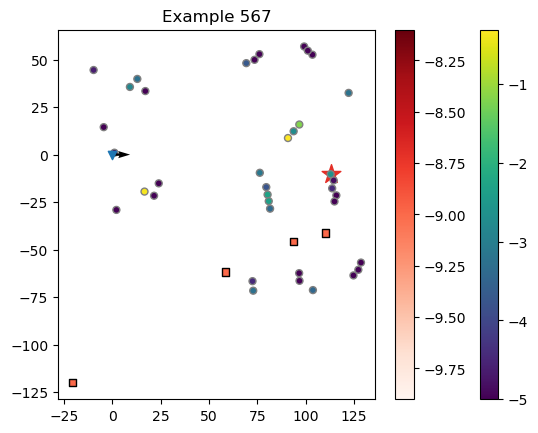

In [21]:
pred_index = 567
pi = val_data[pred_index] > 0
leak_coords = decoder_data[0][pred_index, :, 0, :3, 0]
encoder_coords = encoder_data[0][pred_index, :, 0, :3, 0]
plt.scatter(leak_coords[pi, 0] * leak_coords[pi, 1], 
            leak_coords[pi, 0] * leak_coords[pi, 2],
            200, 1, marker='*', cmap='Reds', vmin=0, vmax=1.5)
plt.scatter(leak_coords[:, 0] * leak_coords[:, 1], leak_coords[:, 0] * leak_coords[:, 2],
           25, np.log10(np.maximum(val_loc_output["leak_loc_pred"][pred_index], 1e-5)), edgecolor='0.5')
plt.colorbar()
plt.scatter(encoder_coords[1:, 0] * encoder_coords[1:, 1], 
            encoder_coords[1:, 0] * encoder_coords[1:, 2], 30, 
            np.log10(np.maximum(encoder_data[0][pred_index, 1:, :, -1, 0].max(axis=1), 1e-9)), cmap="Reds", marker="s", edgecolor='k')
plt.colorbar()
plt.quiver(encoder_coords[0, 0] * encoder_coords[0, 1], 
            encoder_coords[0, 0] * encoder_coords[0, 2],
          encoder_data[0][pred_index, 0, :, 4, 0].mean(),
          encoder_data[0][pred_index, 0, :, 5, 0].mean())
plt.scatter(encoder_coords[0, 0] * encoder_coords[0, 1], 
            encoder_coords[0, 0] * encoder_coords[0, 2], marker="v")
plt.title(f"Example {pred_index:d}")
plt.savefig("prediction_example.png", dpi=300, bbox_inches="tight")

In [76]:
encoder_data[0][pred_index, 1:, :, -1, 0].max(axis=1)

<xarray.DataArray 'encoder_input' (sensor: 4)> Size: 16B
array([2.4517683e-06, 0.0000000e+00, 5.8440196e-06, 1.8058893e-06],
      dtype=float32)
Coordinates:
    variable  <U12 48B 'q_CH4'
Dimensions without coordinates: sensor

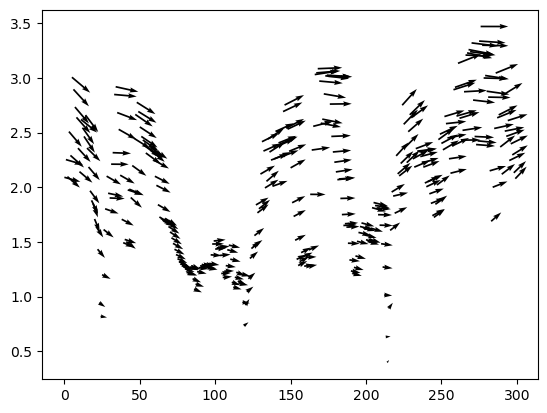

In [85]:
plt.quiver(np.arange(300), np.sqrt(encoder_data[0][pred_index, 0, :, 5, 0] ** 2 + 
                                   encoder_data[0][pred_index, 0, :, 4, 0] ** 2), 
           encoder_data[0][pred_index, 0, :, 4, 0], encoder_data[0][pred_index, 0, :, 5, 0], )


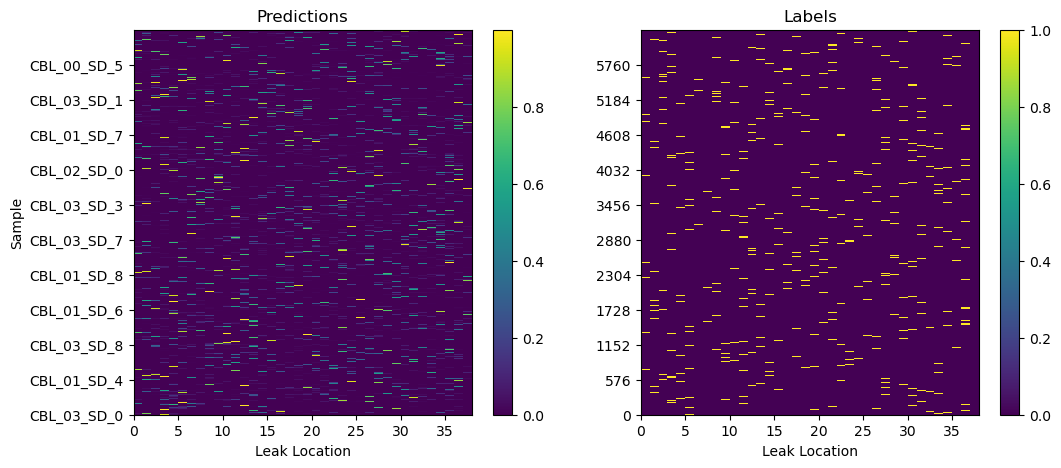

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pcolormesh(val_loc_output["leak_loc_pred"])
plt.yticks(np.arange(0, val_loc_output["leak_loc_pred"].shape[0], 576), f_indices)
plt.xlabel("Leak Location")
plt.ylabel("Sample")
plt.colorbar()
plt.title("Predictions")
plt.subplot(1, 2,2)
plt.pcolormesh(val_data)
plt.yticks(np.arange(0, val_loc_output["leak_loc_pred"].shape[0], 576))
plt.xlabel("Leak Location")
plt.title("Labels")
plt.colorbar()
plt.savefig("pred_true_stars.png", dpi=300, bbox_inches="tight")

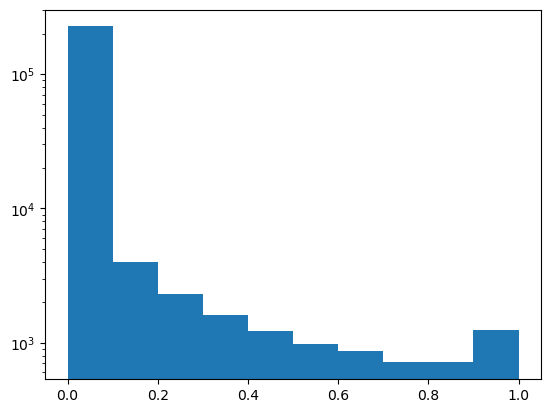

In [10]:
plt.hist(val_loc_output["leak_loc_pred"].values.ravel())
plt.gca().set_yscale("log")

In [7]:
vds = xr.open_dataset(val_files["validation_files"][0])

In [8]:
vds2 = xr.open_dataset(val_files["validation_files"][1])

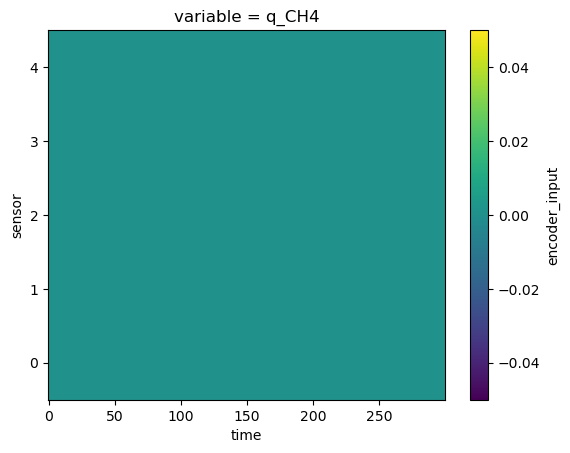

In [12]:
vds["encoder_input"][25, :, :, -1, 0].plot()

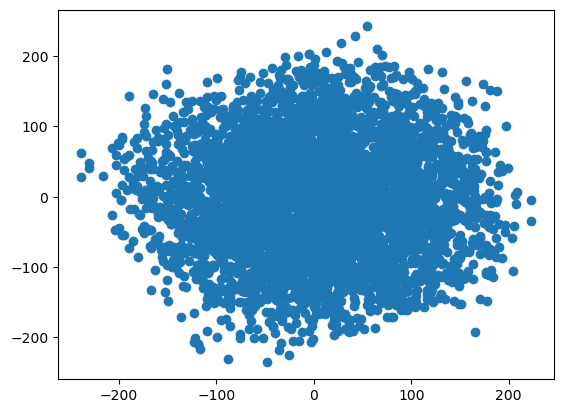

In [39]:
plt.scatter(vds["encoder_input"][:, 1:, -1, 0, 0] * vds["encoder_input"][:, 1:, -1, 1, 0], 
            vds["encoder_input"][:, 1:, -1, 0, 0] * vds["encoder_input"][:, 1:, -1, 2, 0])

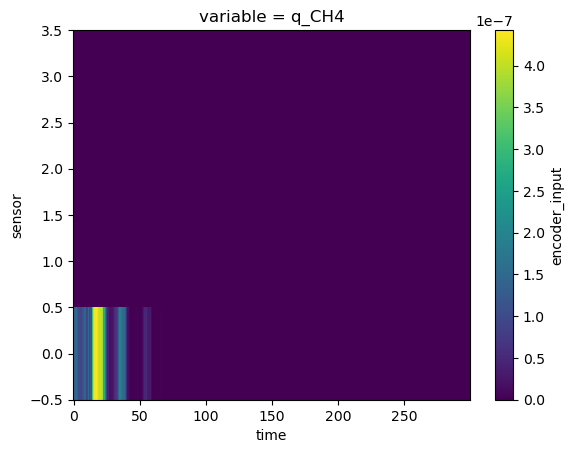

In [20]:
vds["encoder_input"][225, 1:, :, -1, 0].plot()

In [29]:
np.count_nonzero(vds2["encoder_input"][:, 1:, :, -1, 0].max(axis=-1).max(axis=-1) == 0)

366

In [28]:
np.count_nonzero(vds2["encoder_input"][:, 1:, :, -1, 0].max(axis=-1).max(axis=-1) > 0)

786

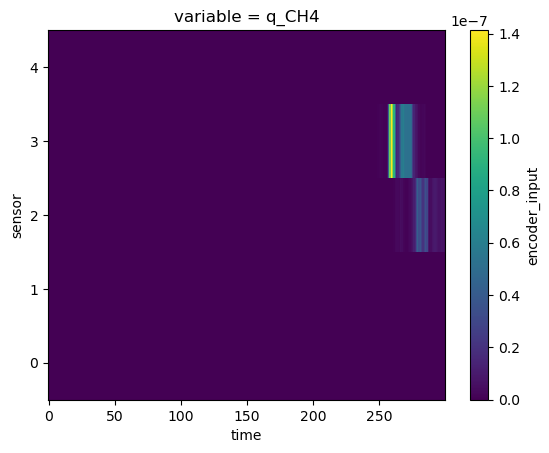

In [11]:
vds2["encoder_input"][25, :, :, -1, 0].plot()

In [35]:
val_data["target"][:, :, 0]

(1152, 38)

In [60]:
val_data["target"][:, :, 0]

<xarray.DataArray 'target' (sample: 1152, pot_leak: 38)> Size: 350kB
[43776 values with dtype=int64]
Dimensions without coordinates: sample, pot_leak

In [68]:
val_data.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [37]:
pred_leak_loc_order

array([[ 3, 18, 26, ..., 20, 10, 37],
       [28,  6,  9, ..., 10, 24, 37],
       [10, 22, 26, ..., 25, 36, 37],
       ...,
       [ 6, 29, 26, ..., 19, 36, 30],
       [ 2, 24, 19, ...,  8, 13, 28],
       [14, 11,  2, ..., 24, 36, 32]])

In [124]:

val_loc_output

<xarray.Dataset> Size: 3MB
Dimensions:        (sample: 6336, pot_leak_locs: 38)
Dimensions without coordinates: sample, pot_leak_locs
Data variables:
    targets        (sample, pot_leak_locs) int64 2MB ...
    leak_loc_pred  (sample, pot_leak_locs) float32 963kB 3.448e-07 ... 1.257e-10

In [48]:
pred_leak_loc_order[i]

array([24, 28, 16, 18, 14, 35, 31, 12,  3,  5, 26, 22,  4, 11,  1,  9, 15,
        2, 23,  8, 10, 21, 25,  0,  6, 27, 32, 36, 34, 30,  7, 29, 20, 19,
       13, 17, 33, 37])

In [23]:
leak_index = np.argmax(val_data.values, axis=1)
pred_leak_loc_order = np.argsort(val_loc_output["leak_loc_pred"].values, axis=1)[:, ::-1]
pred_search_length = np.zeros(leak_index.shape, dtype=int)
for i in range(leak_index.size):
    pred_search_length[i] = np.where(pred_leak_loc_order[i] == leak_index[i])[0][0]    

In [24]:
rng = np.random.default_rng(seed=5032523)
random_leak_loc_order = np.zeros((leak_index.size, 38), dtype=int)
for i in range(leak_index.size):
    random_leak_loc_order[i] = rng.permutation(38)
pred_search_length_random = np.zeros(leak_index.shape, dtype=int)
for i in range(leak_index.size):
    pred_search_length_random[i] = np.where(random_leak_loc_order[i] == leak_index[i])[0][0] 

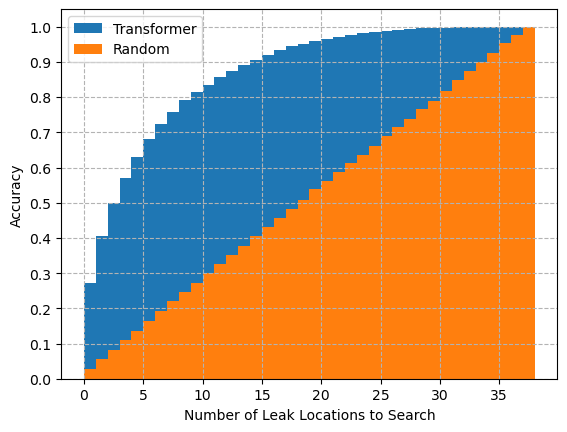

In [166]:
plt.hist(pred_search_length, np.arange(0, 39), cumulative=True, density=True, label="Transformer")
plt.hist(pred_search_length_random, np.arange(0, 39), cumulative=True, density=True, label="Random")

plt.xlabel("Number of Leak Locations to Search")
plt.grid(linestyle="--", color='0.7')
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.savefig("leak_search_accuracy.png", dpi=300, bbox_inches="tight")

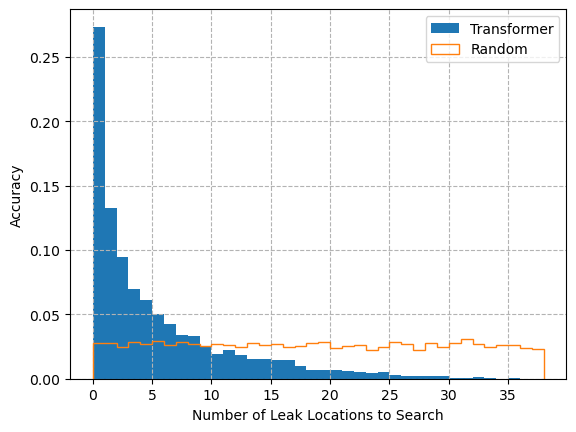

In [26]:
plt.hist(pred_search_length, np.arange(0, 39), cumulative=False, density=True, label="Transformer")
plt.hist(pred_search_length_random, np.arange(0, 39), cumulative=False, density=True, 
         histtype="step", label="Random")

plt.xlabel("Number of Leak Locations to Search")
plt.grid(linestyle="--", color='0.7')
plt.ylabel("Accuracy")
#plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.savefig("leak_search_accuracy.png", dpi=300, bbox_inches="tight")

In [71]:
val_data

<xarray.DataArray 'target' (sample: 6336, pot_leak: 38)> Size: 2MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])
Dimensions without coordinates: sample, pot_leak

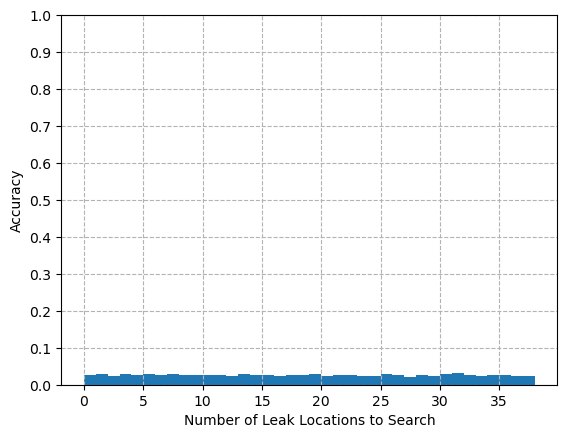

In [64]:
plt.hist(pred_search_length_random, np.arange(0, 39), cumulative=False, density=True)
plt.xlabel("Number of Leak Locations to Search")
plt.grid(linestyle="--", color='0.7')
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.savefig("leak_search_accuracy_random.png", dpi=300, bbox_inches="tight")

In [20]:
np.count_nonzero(pred_search_length < 10) / pred_search_length.size

0.7323232323232324

In [21]:
acc_by_file = np.zeros(f_indices.size)
for i in range(f_indices.size):
    leak_index = np.argmax(val_data.values[1152 * i:1152 * (i + 1)], axis=1)
    pred_leak_loc_order = np.argsort(val_loc_output["leak_loc_pred"].values[1152 * i: 1152 * (i + 1)], axis=1)[:, ::-1]
    pred_search_length = np.zeros(leak_index.shape, dtype=int)
    for j in range(leak_index.size):
        pred_search_length[j] = np.where(pred_leak_loc_order[j] == leak_index[j])[0][0] 
    acc_by_file[i] = np.count_nonzero(pred_search_length == 0) / pred_search_length.size

ZeroDivisionError: division by zero

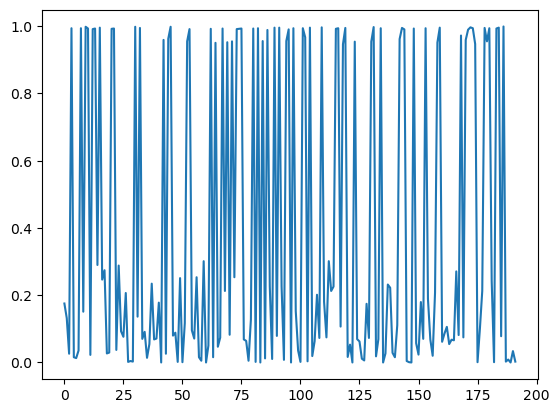

In [75]:
plt.plot(acc_by_file)

In [76]:
acc_by_file

array([1.75347222e-01, 1.31944444e-01, 2.60416667e-02, 9.93923611e-01,
       1.56250000e-02, 1.30208333e-02, 3.55902778e-02, 9.93923611e-01,
       1.51041667e-01, 9.98263889e-01, 9.93055556e-01, 2.25694444e-02,
       9.91319444e-01, 9.93055556e-01, 2.89930556e-01, 9.95659722e-01,
       2.46527778e-01, 2.74305556e-01, 2.69097222e-02, 2.95138889e-02,
       9.92187500e-01, 9.93055556e-01, 3.73263889e-02, 2.88194444e-01,
       9.28819444e-02, 7.63888889e-02, 2.06597222e-01, 1.73611111e-03,
       4.34027778e-03, 2.60416667e-03, 9.98263889e-01, 1.36284722e-01,
       9.94791667e-01, 7.03125000e-02, 9.11458333e-02, 1.38888889e-02,
       5.46875000e-02, 2.34375000e-01, 6.85763889e-02, 7.11805556e-02,
       1.77951389e-01, 0.00000000e+00, 9.59201389e-01, 2.60416667e-02,
       9.62673611e-01, 9.98263889e-01, 7.98611111e-02, 8.85416667e-02,
       1.73611111e-03, 2.50868056e-01, 8.68055556e-04, 1.17187500e-01,
       9.54861111e-01, 9.91319444e-01, 9.54861111e-02, 7.11805556e-02,
      

In [81]:
pd.DataFrame({"srcdim": f_indices.str[-1].astype(int), "acc":acc_by_file}).groupby("srcdim").min()

,acc
srcdim,
0,0.000000
1,0.989583
2,0.946181
3,0.054688
4,0.988715
5,0.000868
6,0.050347
7,0.206597
8,0.013889


In [38]:
scaler = load_scaler(join(model_path, "sensor_scaler.json"))

(0.8, 1.0)

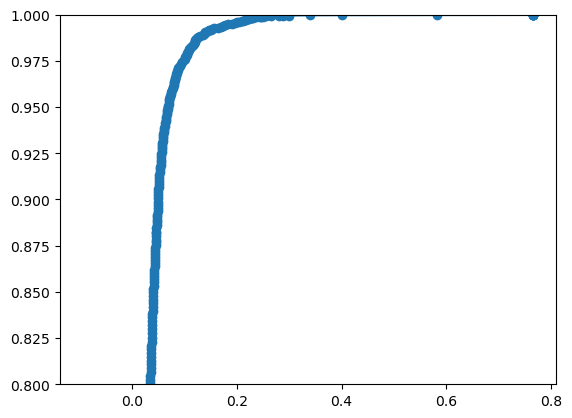

In [40]:
plt.plot(scaler.centroids_[-1][:, 0], np.cumsum(scaler.centroids_[-1][:,1]) / scaler.centroids_[-1][:, 1].sum(), marker='o')
#plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')
plt.ylim(8e-1, 1)

In [30]:
scaler.centroids_[-1]

array([[0.00000000e+00, 2.90000000e+01],
       [0.00000000e+00, 7.70000000e+01],
       [0.00000000e+00, 1.66000000e+02],
       ...,
       [4.56165070e-05, 1.44000000e+02],
       [5.39199162e-05, 9.80000000e+01],
       [6.78148304e-05, 5.60000000e+01]])